In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
 
from mpl_toolkits.axes_grid1 import make_axes_locatable # used to identify main plot axis
import geopandas as gpd #reference for Geopandas https://geopandas.org/mapping.html  

In [2]:
# Load Shape Field for US County Map
fp= 'C:/code/us_county/US_County_Boundaries.shp'
map_df = gpd.read_file(fp)

In [3]:
#map_df.head()
#Drop all states that I do not want to map
#map_df is used for basemap outline, and later to merge with FSA data for scatter plot
map_df = map_df.drop(map_df[map_df.STATE == 'Puerto Rico'].index)
map_df = map_df.drop(map_df[map_df.STATE == 'Hawaii'].index)
map_df = map_df.drop(map_df[map_df.STATE == 'Alaska'].index)

In [4]:
# Data from 2018 FSA Plantings (Jan 2019 report, grain only)
df= pd.read_csv('C:/code/2018_acres_FSA/2018_fsa_grain_sorghum.csv',
                dtype={"state_county_code": str}) #convert FIPs to string for mapping purposes. tutorial from herehttps://plotly.com/python/choropleth-maps/#base-map-configuration 

df.state_county_code.str = df.state_county_code.str.zfill(5) # added a zero as start to match the json "id"
df = df.rename(columns={'state_county_code': 'CTFIPS'}) #change header name to map county shape file column name

df.tail()
#df.info()

,statecode,countycode,cropcode,state,county,CTFIPS,Crop,crop_type,use,irrigation,acres
2220,56,11,51,Wyoming,Crook,56011,SORGHUM,GRAIN,Grain,N,157.54
2221,56,21,51,Wyoming,Laramie,56021,SORGHUM,GRAIN,Grain,N,27.99
2222,56,27,51,Wyoming,Niobrara,56027,SORGHUM,HYBRID STANDARDPLANT FG,Forage,I,108.14
2223,56,33,51,Wyoming,Sheridan,56033,SORGHUM,GRAIN,Forage,N,5.37
2224,72,13,51,Puerto Rico,Arecibo,72013,SORGHUM,GRAIN,Forage,N,373.02


In [5]:
# Sorghum Acres merged with geopandas frame
acres_map = pd.merge(left=map_df, right=df, on='CTFIPS')
# Plotting points for acres of Sorghum derived from the geometry in merged 
acres_map["x"] = acres_map.centroid.x
acres_map["y"] = acres_map.centroid.y

# Drop for mapping
acres_map = acres_map.drop(acres_map[acres_map.STATE == 'Puerto Rico'].index)
acres_map = acres_map.drop(acres_map[acres_map.STATE == 'Hawaii'].index)
acres_map = acres_map.drop(acres_map[acres_map.STATE == 'Alaska'].index)

In [6]:
# Create shape file for RRC

# Ouput filepath
outfp = "C:/code/2018_acres_FSA/grainplanted.shp"

# Save to disk
acres_map.to_file(outfp)

In [7]:
fp = "C:/code/2018_acres_FSA/grainplanted.shp"
data = gpd.read_file(fp)

# Plot Sorghum Acres by County

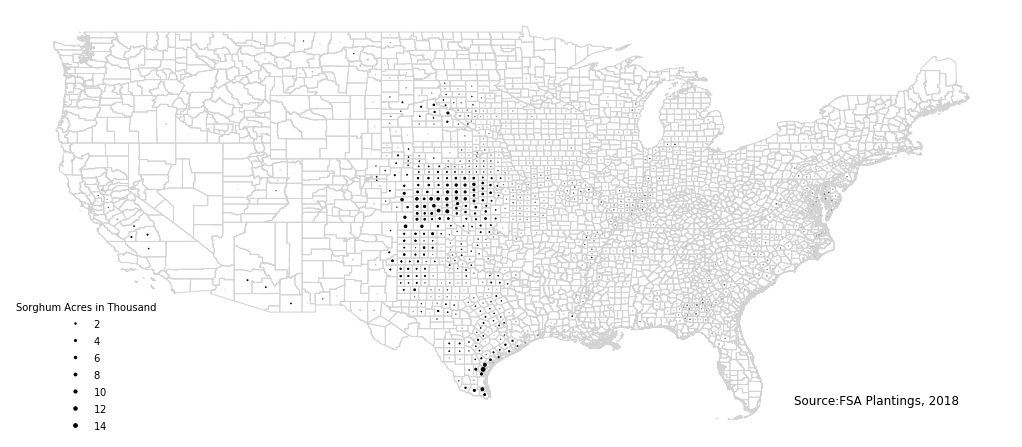

In [8]:
# reference https://geopandas.readthedocs.io/en/latest/mapping.html#creating-a-legend 

fig, ax = plt.subplots(1, figsize=(14, 20))
divider = make_axes_locatable(ax)

ax = map_df.plot(ax=ax, color='None', edgecolor='lightgrey')

# Sorghum Acres by County Scatter Plot
x, y = acres_map['x'].values, acres_map['y'].values
scatter = ax.scatter(x, y, marker="o", c ='black', zorder=5, s=acres_map.acres*.0001, alpha = 1)

handles, labels = scatter.legend_elements(prop="sizes")
legend1 = ax.legend(handles, labels, loc="lower left", title="Sorghum Acres in Thousand", frameon=False)

ax.legend = True 

#ax.set_title('Grain Sorghum Plantings in Acres', size = 16, loc='right')
ax.text(x= -78 , y= 25.5 , s= 'Source:FSA Plantings, 2018', size=12)

ax.set_axis_off()
ax.axis = ('equal')

plt.subplots_adjust(left=0, right=1, bottom=0, top=1) 
plt.savefig('acres_sorghumgrain_2018', bbox_inches='tight', dpi=200, pad_inches = 0)
plt.show()